In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f"{train.head()}\n")
print(f"{train.info()}\n")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

<

In [5]:
print("NULL COUNT: \n")
print(f"{train.isnull().sum()}\n")

NULL COUNT: 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



Nulls in 3 columns: Age, Cabin, and Embarked.

In [6]:
print("NULL COUNT: \n")
print(f"{test.isnull().sum()}\n")

NULL COUNT: 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64



In [7]:
for column in train:
    print(f"{train[column].describe()}\n")

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dty

In [8]:
for column in test:
    print(f"{test[column].describe()}\n")

count     418.000000
mean     1100.500000
std       120.810458
min       892.000000
25%       996.250000
50%      1100.500000
75%      1204.750000
max      1309.000000
Name: PassengerId, dtype: float64

count    418.000000
mean       2.265550
std        0.841838
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

count                  418
unique                 418
top       Kelly, Mr. James
freq                     1
Name: Name, dtype: object

count      418
unique       2
top       male
freq       266
Name: Sex, dtype: object

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

count    418.000000
mean       0.447368
std        0.896760
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

count    4

## `Pclass`

In [9]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Majority of passengers are in the 3rd class. Let's check if there are any patterns between `Pclass` and `Survived`.

In [10]:
pd.crosstab(train['Pclass'], train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Majority of First Class passengers survived, while majority of Third Class passengers did not. There is a clear pattern here, so I will most likely be using `Pclass` in my model.

## `Sex`

In [11]:
train['Sex'].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

There are more male passengers (65%) than female ones (35%).

In [12]:
pd.crosstab(train['Sex'], train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


Yet again, another clear pattern here, where female passengers are more likely to survive. I will also be most likely using `Sex` for the model.

To be able to do so, I used One-Hot Encoding to encode the `Sex` column, which is appropriate in this case because it does not introduce extra ordinality/dimensionality into the dataset.

In [13]:
train = pd.get_dummies(train, columns=['Sex'], drop_first=True)
test = pd.get_dummies(test, columns=['Sex'], drop_first=True)

## `Age`

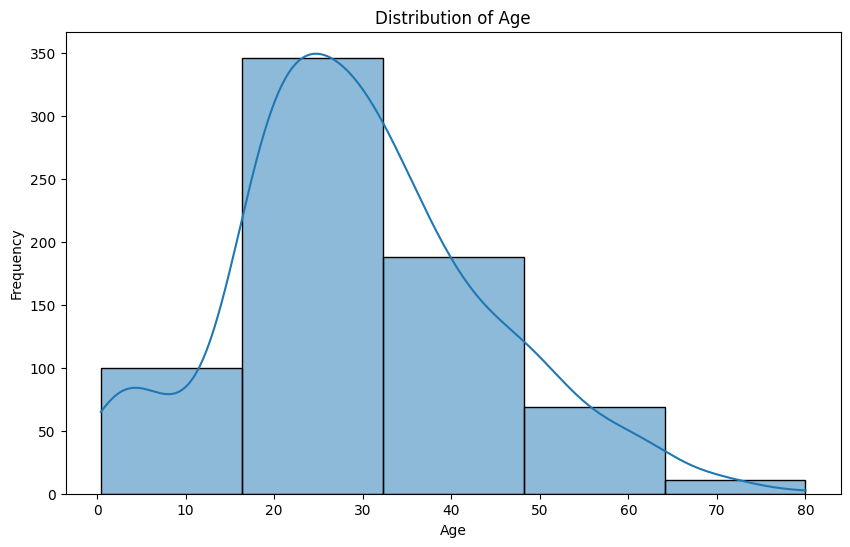

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=5, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram above shows that majority of passengers are young adults (20-30 year olds). Let's check if there's any clear relationship between `Age` and `Survived`.

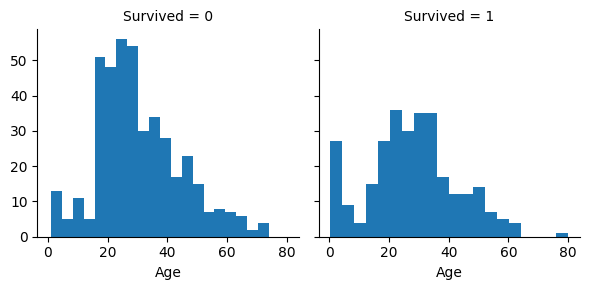

In [15]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Some observations based on `Age` and `Survived`:
- 0-10 y/o children have a high survival rate.
- Most adults (20-35 y/o) did not survive.
- The eldest passengers (~80 y/o) survived.

There is a clear, identifiable pattern here. `Age` looks to be a useful feature, so I will most likely have to impute the missing values so I can use it for the model.


In [16]:
train['Age'].fillna(train['Age'].mean(), inplace = True)
test['Age'].fillna(test['Age'].mean(), inplace = True)

## `Sibsp`

In [17]:
train['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Majority of passengers (68%) are travelling without siblings/spouses, while the highest number of siblings/spouses travelling together goes up to 9.

In [18]:
pd.crosstab(train['SibSp'], train['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


The plot above suggests that the lower the number of siblings/spouses a passenger is travelling with, the more likely it is for that passenger to survive. Before I do anything else, let's check a similar feature first to get a better understanding, `Parch`.

## `Parch`

In [19]:
train['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Majority of passengers are travelling without parents/children.

In [20]:
pd.crosstab(train['Parch'], train['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


A similar pattern to the one in `SibSp` appears here, where a good number of passengers travelling without parents/children survived, while passengers with only 1 parent/child onboard survived more often than not. Since the two are similarly talking about partners/family onboard and have a similar pattern of distribution, I can merge these two features together to reduce the dimensionality of the data.

In [21]:
train['Alone'] = ((train['Parch'] == 0) & (train['SibSp'] == 0)).astype(int)
train['Alone'].value_counts()

Alone
1    537
0    354
Name: count, dtype: int64

The `Alone` column now shows whether or not a passenger is travelling alone. 1 denotes the passenger is travelling alone, while 0 denotes the passenger is travelling with a family member/partner.

With this, I can now drop both `Parch` and `SibSp` columns.

In [22]:
test['Alone'] = ((test['Parch'] == 0) & (test['SibSp'] == 0)).astype(int)

train = train.drop(['SibSp', 'Parch'], axis = 1)
test = test.drop(['SibSp', 'Parch'], axis = 1)

## `Name`

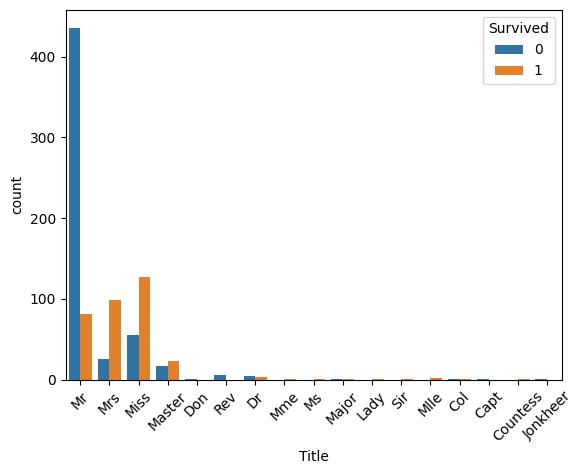

In [23]:
import re

# Extract titles from the Name column
train['Title'] = train['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))
test['Title'] = test['Name'].apply(lambda x: re.search(' ([A-Za-z]+)\.', x).group(1))


# Plot the survival rate for each title
sns.countplot(x='Title', hue='Survived', data=train)
plt.xticks(rotation=45)
plt.show()

Feminine titles, like 'Mrs' and 'Miss' seem to experience a better chance at survival than masculine ones like 'Mr'. Also, notice how some titles overlap meanings with one another, such as Miss, Ms, Mlle (Mademoiselle), and Mme (Madame). I will standardize them all into 'Miss' to prevent excess titles. I will also group all the unusual/rare titles that do not have high occurences together, such as Don, Rev, Countess, Jonkheer, etc. 

In [24]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

In [25]:
train['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64

I will again be using One-Hot Encoding to encode the `Title` column.

In [26]:
train = pd.get_dummies(train, columns=['Title'])
test = pd.get_dummies(test, columns=['Title'])

I will drop the 'Name' column since I get the same information from the 'Title' column anyway. Also this way, I can encode the categorical variable 'Title'.

In [27]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

## `Ticket`

In [28]:
train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

The `Ticket` column consists of seemingly random combination of numbers and sometimes, letters. There are also repeating ticket numbers which I am going to investigate further as to reason why.

In [29]:
print(train[train['Ticket'] == '347082'])

     PassengerId  Survived  Pclass   Age  Ticket    Fare Cabin Embarked  \
13            14         0       3  39.0  347082  31.275   NaN        S   
119          120         0       3   2.0  347082  31.275   NaN        S   
541          542         0       3   9.0  347082  31.275   NaN        S   
542          543         0       3  11.0  347082  31.275   NaN        S   
610          611         0       3  39.0  347082  31.275   NaN        S   
813          814         0       3   6.0  347082  31.275   NaN        S   
850          851         0       3   4.0  347082  31.275   NaN        S   

     Sex_male  Alone  Title_Master  Title_Miss  Title_Mr  Title_Mrs  \
13       True      0         False       False      True      False   
119     False      0         False        True     False      False   
541     False      0         False        True     False      False   
542     False      0         False        True     False      False   
610     False      0         False       Fal

Passengers with the same ticket number seem to come from the same family (Andersson, as shown above). There is now good reason to drop this column, as this relationship is captured by the `Alone` column anyway.

In [30]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

## `Fare`

In [31]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

On average, a ticket costs 32 dollars. The highest ticket price costs 16x the average, at $512. Let's inspect this anomaly further.

In [32]:
dummy = pd.read_csv('train.csv')
dummy[dummy['Fare'] == 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Three passengers with the highest ticket prices, embarked from the same port with the same first class ticket number, and they all survived. I will now check whether or not there is a relationship between how high the fare is and survival.

<Axes: xlabel='Survived', ylabel='Fare'>

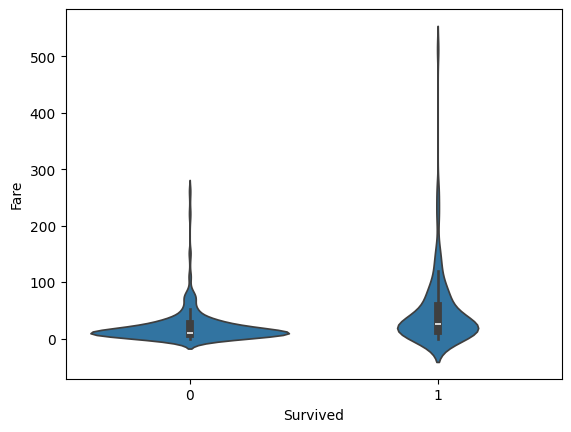

In [33]:
sns.violinplot(data=train, x='Survived', y='Fare')

The violinplot above does reveal that on average, lower fare passengers are least likely to survive. Looking at the tails of two violins, it does seem to appear that higher fare payers are more likely to be on the survived side, in other words, there are more high-paying passengers on the survived side.

The plot also reveals that both the median and interquartile range of fare for survivors are higher on the survived side, indicating that generally, survivors paid more.

These are clear patterns that emerge from `Fare`, as such I will be using this feature for the model later on.

Before that, there is a missing `Fare` value in the test dataframe, let's check it out first.

In [34]:
dummy_test = pd.read_csv('test.csv')
dummy_test[dummy_test['Fare'].isna()==True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


The passenger with missing fare holds a third class ticket. To fill in this missing value, it is best to get the average fare of third class ticket holders, so as to not introduce further random noise into the dataset. 

In [35]:
dummy_test[dummy_test['Pclass'] == 3]['Fare'].mean()

12.459677880184334

The average third class ticket costs $12.46, which I can now add into the missing row.

In [36]:
test['Fare'].fillna(12.459678, inplace=True)

In [37]:
test[test['PassengerId'] == 1044]

,PassengerId,Pclass,Age,Fare,Cabin,Embarked,Sex_male,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
152,1044,3,60.5,12.459678,NaN,S,True,1,False,False,True,False,False


## `Cabin`

In [38]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

204 cabins listed, but only 147 unique cabins. This could be due to multiple passengers staying in the same cabin. There are 687 missing cabin information, which is accurate according to information listed on [Titanic Facts](https://titanicfacts.net/titanic-ship/.).

Reading through that site, there are supposedly 416 first class cabins, 162 second class cabins, and 262 third class cabins. As such, since there are too many missing information on `Cabin` and the information can be gathered from `Pclass` anyway, I can safely drop this column. 

In [39]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

## `Embarked`

In [40]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

644 passengers embarked from S (Southampton) port, 168 from C (Cherbourg) port, and 77 from Q (Queenstown) port. Looking at the Titanic route online, I can know that the ship first started from Southampton, England, before sailing down to Cherbourg, France, then across to Queenstown, Ireland before sinking.

The most passengers embarked on the starting port S, before decreasing in number as the ship embarked from more ports (C & Q).

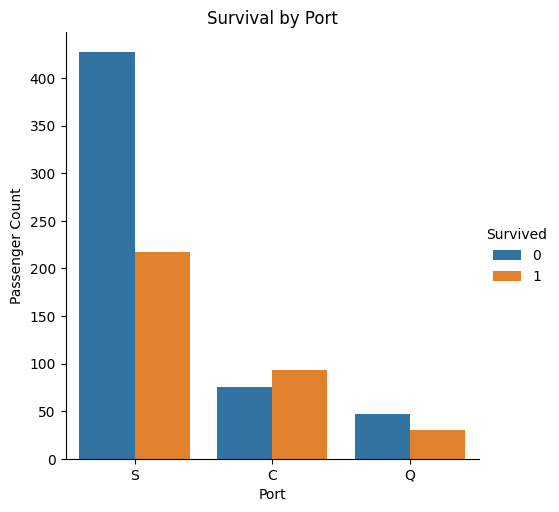

In [41]:
sns.catplot(x='Embarked', hue='Survived', data=train, kind='count')
plt.xlabel('Port')
plt.ylabel('Passenger Count')
plt.title('Survival by Port')
plt.show()

By ratio, it would seem that Passengers embarking from Cherbourg have a higher number of survivors than the two other ports.

I now need to complete the missing data in `Embarked`. There are 2 missing data in `Embarked` on the train dataset. I will replace the missing value with the column's mode.

In [42]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

Now I will use Label Encoding to encode this column, as there is an ordinal relationship between the categories of `Embarked`.

In [43]:
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
train['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

With the data cleaning completed, let's check both dataframes to make sure everything is working as intended.

In [44]:
train.head()

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Sex_male,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,22.0,7.2500,0,True,0,False,False,True,False,False
1,2,1,1,38.0,71.2833,1,False,0,False,False,False,True,False
2,3,1,3,26.0,7.9250,0,False,1,False,True,False,False,False
3,4,1,1,35.0,53.1000,0,False,0,False,False,False,True,False
4,5,0,3,35.0,8.0500,0,True,1,False,False,True,False,False


In [45]:
test.head()

,PassengerId,Pclass,Age,Fare,Embarked,Sex_male,Alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,892,3,34.5,7.8292,2,True,1,False,False,True,False,False
1,893,3,47.0,7.0000,0,False,0,False,False,False,True,False
2,894,2,62.0,9.6875,2,True,1,False,False,True,False,False
3,895,3,27.0,8.6625,0,True,1,False,False,True,False,False
4,896,3,22.0,12.2875,0,False,0,False,False,False,True,False


I can drop `PassengerId` from both dataframes, as they are totally unique and won't contain any useful information anyway.

In [46]:
train = train.drop('PassengerId', axis=1)
test = test.drop('PassengerId', axis=1)

In [47]:
print("NULL COUNT: \n")
print(f"{train.isnull().sum()}\n")

NULL COUNT: 

Survived        0
Pclass          0
Age             0
Fare            0
Embarked        0
Sex_male        0
Alone           0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Other     0
dtype: int64



In [48]:
print("NULL COUNT: \n")
print(f"{test.isnull().sum()}\n")

NULL COUNT: 

Pclass          0
Age             0
Fare            0
Embarked        0
Sex_male        0
Alone           0
Title_Master    0
Title_Miss      0
Title_Mr        0
Title_Mrs       0
Title_Other     0
dtype: int64



## Modelling

Getting the Prediction Features for training and testing purposes.

Features used for Prediction:
- `PClass`
- `Age`
- `Fare`
- `Embarked`
- `Sex_male`
- `Alone`
- `Title_Master`
- `Title_Miss`    
- `Title_Mr`    
- `Title_Mrs`    
- `Title_Other`

Feature to predict:
- `Survived`

In [49]:
X_train = train.drop(columns=['Survived'])
X_test = test

In [50]:
X_train.columns

Index(['Pclass', 'Age', 'Fare', 'Embarked', 'Sex_male', 'Alone',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other'],
      dtype='object')

In [51]:
y_train = train['Survived']

## Training the model

I used an XGBoost (Extreme Gradient Boost) and a CatBoost classifier models with best case-adjusted hyperparameters. 

In [52]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform, randint

# param_dist = {
#     'n_estimators': randint(100, 1000),
#     'learning_rate': uniform(0.01, 0.1),
#     'max_depth': randint(3, 10),
#     'min_child_weight': randint(1, 10),
#     'subsample': uniform(0.6, 0.4),
#     'colsample_bytree': uniform(0.6, 0.4),
#     'gamma': uniform(0, 0.5),
#     'reg_alpha': uniform(0, 1),
#     'reg_lambda': uniform(0, 1)
# }

# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# random_search = RandomizedSearchCV(
#     model,
#     param_distributions=param_dist,
#     n_iter=100,
#     scoring='neg_root_mean_squared_error',
#     cv=3,
#     verbose=1,
#     random_state=42,
#     n_jobs=-1
# )


# random_search.fit(X_train, y_train)

# best_model = random_search.best_estimator_

# y_pred = best_model.predict(X_test)

In [53]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV


cat_features = [col for col in X_train.columns if X_train[col].dtype == 'object' or 
                X_train[col].dtype.name == 'category']

for col in cat_features:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

train_pool = Pool(data=X_train, label=y_train, cat_features=cat_features)
# test_pool = Pool(data=X_test, cat_features=cat_features)

cat_model = CatBoostClassifier(random_seed=42, verbose=0)

param_grid = {
    'iterations': [500, 1000, 1500],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7]
}

grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train, cat_features=cat_features)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

best_cat_model = CatBoostClassifier(**best_params, random_seed=42, verbose=100)
best_cat_model.fit(train_pool)

y_pred = best_cat_model.predict(X_test)

In [1]:
# import tensorflow as tf
# print(tf.__version__)

# #import tensorflow_decision_forests as tfdf

2.16.1


In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = dummy_test['PassengerId']
submission['Survived'] = y_pred

In [ ]:
submission

## Output to a .csv for submission

In [ ]:
submission.to_csv("submission.csv", index=False)